In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

In [3]:
walk = pd.read_csv('../Raw_data/walk_vera.csv')
run = pd.read_csv('../Raw_data/run_vera.csv')

In walking and in running, the vertical forces have to support a person's body weight and produce a change of momentum for the following stride. On the other hand, the vertical force only has to balance a person's body weight in standing. As a result, the total force acting on a person's feet should be greater when walking and running than when standing. A person's body weight, body strength, stride length, and how they land on their feet when walking can also affect the total force on their feet. We can compare our walking gait based on the total force.

In [4]:
walk


In [5]:
run

,time,gFx,gFy,gFz,gFTotal
0,2020-08-04 17:38:33.6710,0.263,-0.947,-0.190,1.001
1,2020-08-04 17:38:33.6770,0.246,-0.947,-0.186,0.996
2,2020-08-04 17:38:33.6820,0.253,-0.955,-0.178,1.004
3,2020-08-04 17:38:33.7060,0.280,-0.941,-0.191,1.000
4,2020-08-04 17:38:33.7060,0.280,-0.941,-0.191,1.000
...,...,...,...,...,...
16642,2020-08-04 17:41:19.6560,0.154,-0.997,-0.021,1.009
16643,2020-08-04 17:41:19.6880,0.188,-0.963,-0.050,0.982
16644,2020-08-04 17:41:19.6890,0.188,-0.963,-0.050,0.982
16645,2020-08-04 17:41:19.6900,0.188,-0.963,-0.050,0.982


In [6]:
# Butterworth filter
b, a = signal.butter(6, 0.04, btype='lowpass', analog=False)
low_passed_walk = signal.filtfilt(b, a, walk['gFTotal'])
low_passed_run = signal.filtfilt(b, a, run['gFTotal'])

In [7]:
walk['filtered_gFTotal'] = pd.DataFrame(data=low_passed_walk, columns=['filtered_gFTotal'])
run['filtered_gFTotal'] = pd.DataFrame(data=low_passed_run, columns=['filtered_gFTotal'])

#### Find correlation between variables

The following correlation matrix and the correlation plot show that the vertical force and the g total force indeed have quite a strong negative relationship.

In [8]:
corrMatrix = walk.corr()
corrMatrix

,gFx,gFy,gFz,gFTotal,filtered_gFTotal
gFx,1.000000,0.196835,0.260226,0.197655,0.340041
gFy,0.196835,1.000000,-0.145620,-0.707167,-0.351923
gFz,0.260226,-0.145620,1.000000,0.370633,0.373937
gFTotal,0.197655,-0.707167,0.370633,1.000000,0.742217
filtered_gFTotal,0.340041,-0.351923,0.373937,0.742217,1.000000


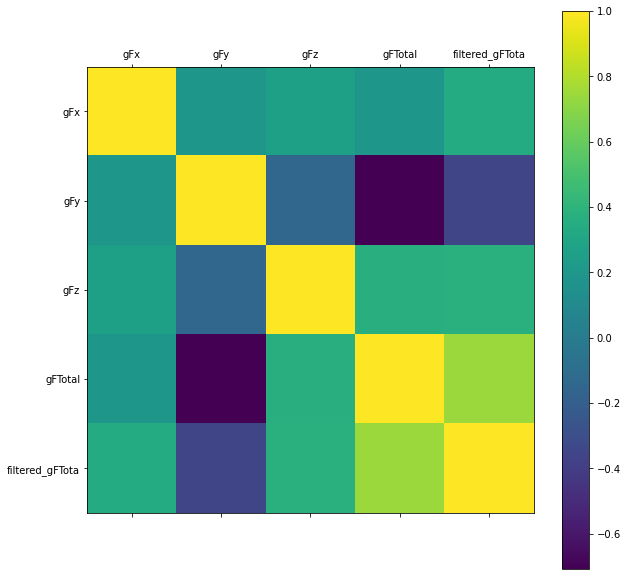

In [9]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.matshow(corrMatrix)
plt.xticks(range(walk.shape[1]-1), ('gFx', 'gFy', 'gFz', 'gFTotal', 'filtered_gFTota'))
plt.yticks(range(walk.shape[1]-1), ('gFx', 'gFy', 'gFz', 'gFTotal', 'filtered_gFTota'))
plt.colorbar()
plt.show()

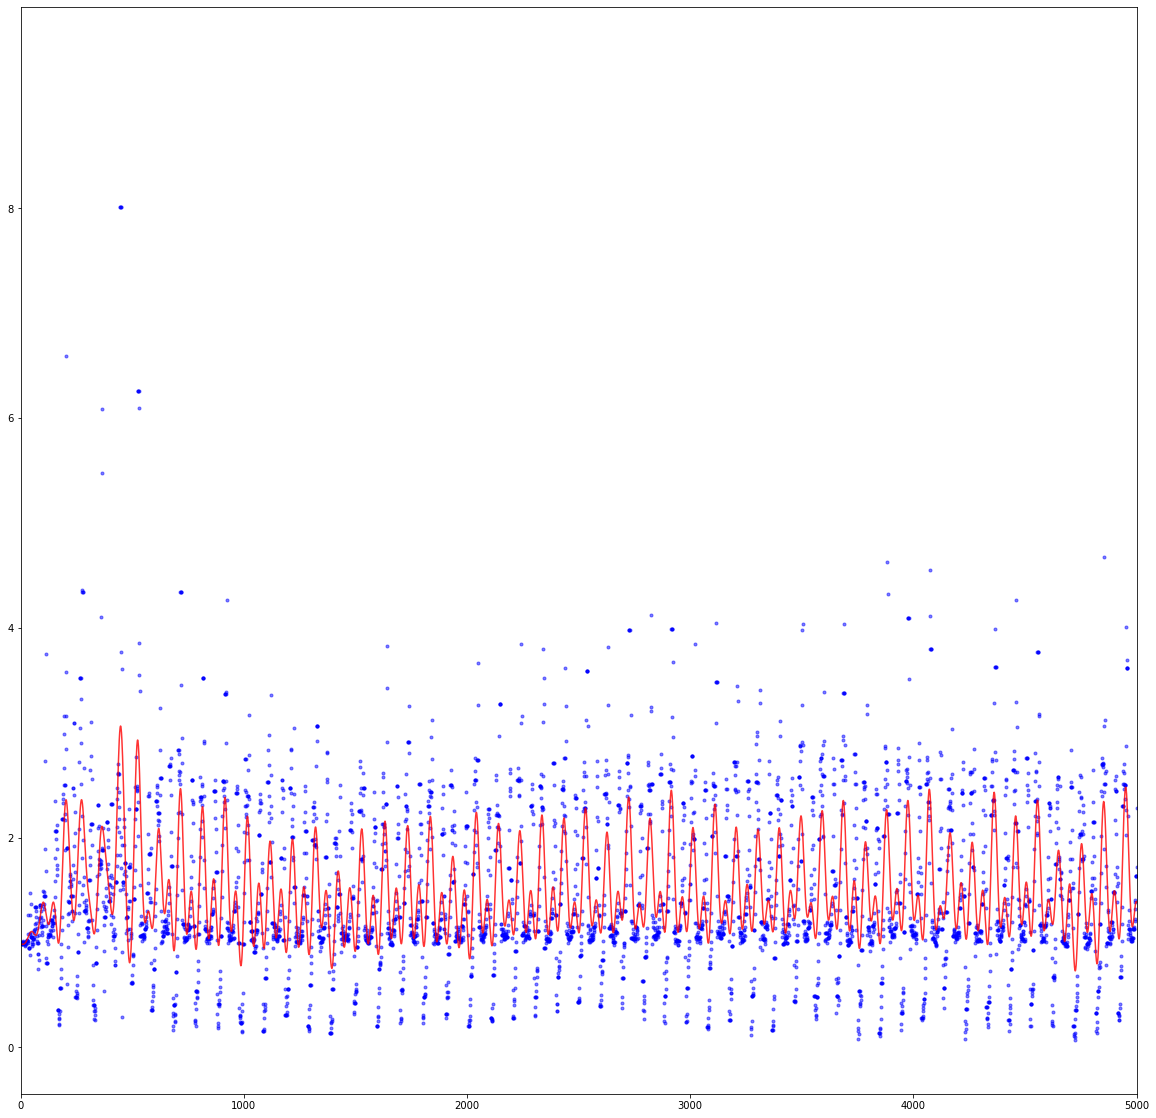

In [23]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.plot(walk['gFTotal'], 'b.', alpha = 0.5)
plt.plot(walk['filtered_gFTotal'], 'r-', alpha = 0.8)
plt.xlim(0, 5000)
plt.show()

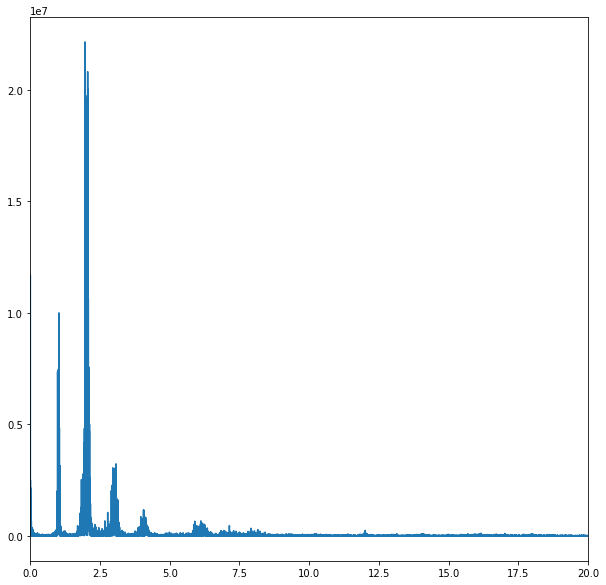

In [20]:
plt.rcParams['figure.figsize'] = (10, 10)
sp = np.fft.fft(walk['gFTotal'].values)
freq = np.fft.fftfreq(len(walk['gFTotal']), d = 1/100)
i = freq > 0
plt.plot(freq[i], abs(sp[i])**2)
plt.xlim(0, 20)
plt.show()